# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [227]:
import glob
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

### Read Images

In [228]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array


def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder,filename)
        if "cat" in path:
            labels.append(1)
        else:
            labels.append(0)
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
    return images, labels

images, labels = load_images_from_folder("HW/data_aug")

### Prepare Dataset

In [229]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

for counter in range(len(images)):
    images[counter] = images[counter]/255



In [230]:
# Resize your images to (28 * 28)

for counter in range(len(images)):
    images[counter] = cv2.resize(images[counter], (28 , 28), interpolation = cv2.INTER_AREA)


In [231]:
# Flatten your dataset images 
for counter in range(len(images)):
    images[counter] = images[counter].flatten()

In [232]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.

images_np = np.asarray(images, dtype=np.float32)
lebels_np = np.asarray(labels, dtype=np.float32)

print("lebels shape: "+str(lebels_np.shape))
print("images shape: "+str(images_np.shape))


lebels shape: (100,)
images shape: (100, 2352)


### Create your Model

In [233]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from tensorflow import keras
from tensorflow.keras import layers

In [234]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem

model = keras.Sequential(name="Aug")
model.add(layers.Dense(100, activation="relu", name="hidden1"))
model.add(layers.Dense(50, activation="relu", name="hidden2"))
model.add(layers.Dense(20, activation="relu", name="hidden3"))
model.add(layers.Dense(1, activation="sigmoid", name="out"))

In [235]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(images_np, lebels_np)

In [236]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

batch_size = 64
epochs = 100

model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=0.2)



Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 0.7294 - accuracy: 0.5000 - val_loss: 0.8077 - val_accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6934 - accuracy: 0.5167 - val_loss: 0.6222 - val_accuracy: 0.7333
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6898 - accuracy: 0.5000 - val_loss: 0.7049 - val_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6681 - accuracy: 0.6167 - val_loss: 0.7674 - val_accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6657 - accuracy: 0.5333 - val_loss: 0.6815 - val_accuracy: 0.5333
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6480 - accuracy: 0.8000 - val_loss: 0.6590 - val_accuracy: 0.6000
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6417 - accuracy: 0.6333 - val_loss: 0.7369 - val_accuracy: 0.3333
Epoch 8/100
1/1 [==

### Plot results

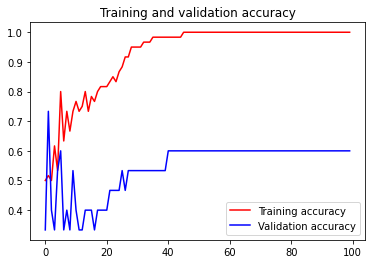

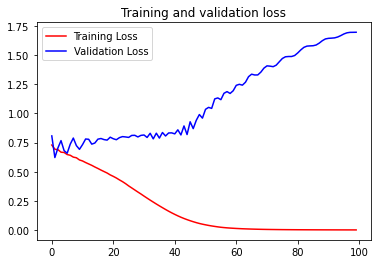

In [237]:
# Plot your data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [238]:
# Evaluate your model on the test data

score = model.evaluate(
    test_data, test_labels, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.9180108308792114
Test accuracy: 0.5600000023841858


# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [56]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [57]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [58]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [59]:
def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [60]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [61]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [62]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [194]:
# For each image in our dataset run the previous methods and create a new dataset
def augmentation(img):

    if (random.randint(0,1) == 1):
        img = zoom(img,random.uniform(0.001, 0.01))

    if (random.randint(0,1) == 1):
        img = vertical_flip(img)

    if (random.randint(0,1) == 1):
        img = horizontal_shift(img)

    if (random.randint(0,1) == 1):
        img = vertical_shift(img)

    if (random.randint(0,1) == 1):
        rand = random.randint(0,10)
        img = brightness(img,-rand,rand)

    if (random.randint(0,1) == 1):
        img = channel_shift(img,random.randint(0,1))

    if (random.randint(0,1) == 1):
        img = horizontal_flip(img)

    return img
        

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        for counter in range(50):
            path = os.path.join(folder,filename)
            if "cat" in path:
                labels.append(1)
            else:
                labels.append(0)

            img = augmentation(cv2.imread(path))
            # img = cv2.imread(path)
            if img is not None:
                images.append(img)

    for filename in os.listdir(folder):
            path = os.path.join(folder,filename)
            if "cat" in path:
                labels.append(1)
            else:
                labels.append(0)

            img = cv2.imread(path)
            if img is not None:
                images.append(img)

    return images, labels

images, labels = load_images_from_folder("HW/data_aug")


In [195]:

# Extend your labels array new size with correct labels maped to each agumented image

    ########################
    ## PUT YOUR CODE HERE ##
    ########################


In [196]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

for counter in range(len(images)):
    images[counter] = images[counter]/255



In [197]:
# Resize your images to (28 * 28)

for counter in range(len(images)):
    images[counter] = cv2.resize(images[counter], (28 , 28), interpolation = cv2.INTER_AREA)


In [198]:
# Flatten your dataset images 


for counter in range(len(images)):
    images[counter] = images[counter].flatten()


In [199]:
# Check your dataset and labels to be a numpy ndarray of sizes (100, 28 * 28 * 3) and (100, 1) respectively.
images_np = np.asarray(images, dtype=np.float32)
lebels_np = np.asarray(labels, dtype=np.float32)

print("lebels shape: "+str(lebels_np.shape))
print("images shape: "+str(images_np.shape))

lebels shape: (5100,)
images shape: (5100, 2352)


### Create your model

In [210]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem

model = keras.Sequential(name="Aug")
model.add(layers.Dense(100, activation="relu", name="hidden1"))
model.add(layers.Dense(50, activation="relu", name="hidden2"))
model.add(layers.Dense(20, activation="relu", name="hidden3"))
model.add(layers.Dense(1, activation="sigmoid", name="out"))

In [211]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(images_np, lebels_np)

In [212]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

batch_size = 64
epochs = 100

model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=0.2)



Epoch 1/100
48/48 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5108 - val_loss: 0.6961 - val_accuracy: 0.5111
Epoch 2/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5415 - val_loss: 0.7554 - val_accuracy: 0.5059
Epoch 3/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5425 - val_loss: 0.6890 - val_accuracy: 0.5425
Epoch 4/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.5895 - val_loss: 0.6747 - val_accuracy: 0.5804
Epoch 5/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5650 - val_loss: 0.6781 - val_accuracy: 0.5621
Epoch 6/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5624 - val_loss: 0.6810 - val_accuracy: 0.5699
Epoch 7/100
48/48 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.5775 - val_loss: 0.6696 - val_accuracy: 0.5843
Epoch 8/100
4

### Plot your results

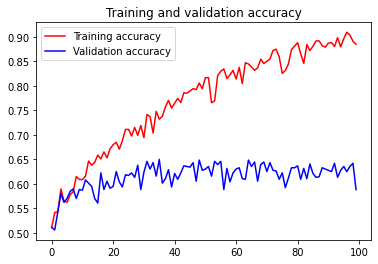

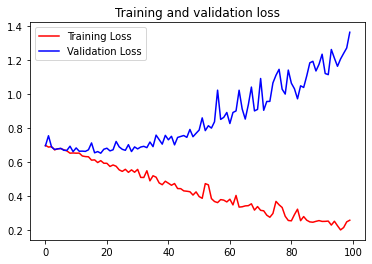

In [213]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [214]:
# Evaluate your model on the test data


score = model.evaluate(
    test_data, test_labels, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])



Test loss: 1.4051415920257568
Test accuracy: 0.6054902076721191


# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [345]:
# Optional

# Keras data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'HW/train/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 100 images belonging to 2 classes.


In [327]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import optimizers

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(32, 3, activation='relu')(img_input) 
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x) 
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(128, 3, activation='relu')(x) 
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x) 

x = layers.Dropout(0.2)(x)

output = layers.Dense(1, activation="sigmoid")(x)

model = Model(img_input, output)
model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

In [322]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder,filename)
        if "cat" in path:
            labels.append(1)
        else:
            labels.append(0)
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
    return images, labels

images, labels = load_images_from_folder("HW/test")

In [328]:
batch_size = 64
epochs = 5

model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_generator, batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/5
100/100 [==============================] - 7s 63ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 6s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 6s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [335]:
test_datagen = ImageDataGenerator()

# Flow training images in batches of 32 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        'HW/test',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=1,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 12 images belonging to 2 classes.


In [336]:
score = model.evaluate(
    test_generator, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.0
Test accuracy: 1.0


In [346]:
images=[]
labels=[]
for counter in range(100):
    images.append(train_generator[counter][0])
    labels.append(train_generator[counter][1])

In [360]:
for counter in range(len(images)):
    images[counter] = images[counter]/255

for counter in range(len(images)):
    images[counter] = cv2.resize(images[counter][0], (28 , 28), interpolation = cv2.INTER_AREA)

for counter in range(len(images)):
    images[counter] = images[counter].flatten()

images_np = np.asarray(images, dtype=np.float32)
lebels_np = np.asarray(labels, dtype=np.float32)

print("lebels shape: "+str(lebels_np.shape))
print("images shape: "+str(images_np.shape))



lebels shape: (100, 1)
images shape: (100, 2352)


Epoch 1/100
1/1 [==============================] - 0s 322ms/step - loss: 0.6931 - accuracy: 0.0000e+00 - val_loss: 0.6902 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6902 - accuracy: 1.0000 - val_loss: 0.6865 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6865 - accuracy: 1.0000 - val_loss: 0.6830 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 1.0000 - val_loss: 0.6793 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6793 - accuracy: 1.0000 - val_loss: 0.6754 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6754 - accuracy: 1.0000 - val_loss: 0.6713 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 1.0000 - val_loss: 0.6672 - val_accuracy: 1.0000
Epoch 8/100
1/1

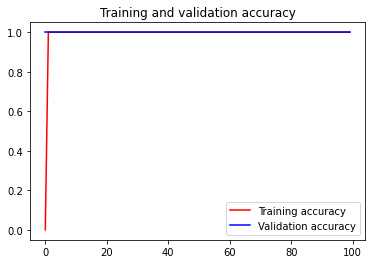

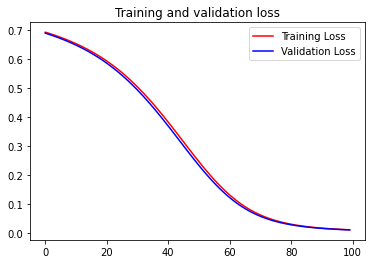

In [361]:
model = keras.Sequential(name="Aug")
model.add(layers.Dense(100, activation="relu", name="hidden1"))
model.add(layers.Dense(50, activation="relu", name="hidden2"))
model.add(layers.Dense(20, activation="relu", name="hidden3"))
model.add(layers.Dense(1, activation="sigmoid", name="out"))

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(images_np, lebels_np)
batch_size = 64
epochs = 100

model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=0.2)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


score = model.evaluate(
    test_data, test_labels, verbose=0
)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
plt.show()